In [34]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import math
import importlib

import IrisLocalization
import IrisNormalization
import IrisEnhancement

importlib.reload(IrisLocalization)
importlib.reload(IrisNormalization)
importlib.reload(IrisEnhancement)

<module 'IrisEnhancement' from 'c:\\Users\\Javier Jiang\\Desktop\\Courses\\STAT5293 Applied Machine Learning for Image Analysis\\Iris-Recognization-Project\\IrisEnhancement.py'>

Localization(image)  
&emsp;return (x_in,y_in,r_in), (x_out,y_out,r_out)  
Normalization(image, incir, outcir)  
&emsp;return unwrapImage  
Enhancement(image)  
&emsp;return image_normalized

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IndexError: index 280 is out of bounds for axis 0 with size 280

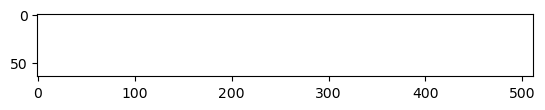

In [35]:
for i in range(1,10):
    count = str(i).rjust(3,"0")
    path = 'CASIA Iris Image Database (version 1.0)/'+count+'/1'
    for j in range(1,4):
        image_file = os.path.join(path, count+'_1_'+str(j)+'.bmp')
        image = cv2.imread(image_file)
        incir, outcir = IrisLocalization.Localization(image)
        image_normalized = IrisNormalization.Normalization(image, incir, outcir)
        plt.imshow(image_normalized)
        plt.savefig("./Normalized figures/"+count+'_1_'+str(j)+".png")